In [0]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, precision=2)

In [0]:
import csv
wine_path = "winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [0]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [0]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [0]:
data = wineq[:, :-1] # <1>
data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]), torch.Size([4898, 11]))

In [0]:
target = wineq[:, -1] # <2>
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [0]:
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

In [0]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [0]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [0]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01, 1.38e+02,
        9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01])

In [0]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.12e-01, 1.02e-02, 1.46e-02, 2.57e+01, 4.77e-04, 2.89e+02, 1.81e+03,
        8.95e-06, 2.28e-02, 1.30e-02, 1.51e+00])

In [0]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.35e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])

In [0]:
bad_indexes = target <= 3 # <1>
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [0]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [0]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)] # <1>
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [0]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [0]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [0]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

Time Series


In [0]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [0]:
bikes_np = np.loadtxt("hour-fixed.csv", 
                         dtype=np.float32, 
                         delimiter=",", 
                         skiprows=1, 
                         converters={1: lambda x: float(x[8:10])}) # <1>
bikes = torch.from_numpy(bikes_np)
bikes

tensor([[1.00e+00, 1.00e+00,  ..., 1.30e+01, 1.60e+01],
        [2.00e+00, 1.00e+00,  ..., 3.20e+01, 4.00e+01],
        ...,
        [1.74e+04, 3.10e+01,  ..., 4.80e+01, 6.10e+01],
        [1.74e+04, 3.10e+01,  ..., 3.70e+01, 4.90e+01]])

In [0]:
bikes.shape, bikes.stride()


(torch.Size([17520, 17]), (17, 1))

In [0]:
dailybikes = bikes.view(-1, 24, bikes.shape[1])
dailybikes.shape, dailybikes.stride()


(torch.Size([730, 24, 17]), (408, 17, 1))

In [0]:
dailybikes = dailybikes.transpose(1, 2)
dailybikes.shape, dailybikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [0]:
firstday = bikes[:24].long()
weather_onehot = torch.zeros(firstday.shape[0], 4)
firstday[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [0]:
weather_onehot.scatter_(
    dim=1, 
    index=firstday[:,9].unsqueeze(1).long() - 1, # <1>
    value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [0]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]


tensor([[ 1.00,  1.00,  1.00,  0.00,  1.00,  0.00,  0.00,  6.00,  0.00,  1.00,
          0.24,  0.29,  0.81,  0.00,  3.00, 13.00, 16.00,  1.00,  0.00,  0.00,
          0.00]])

In [0]:
weather_onehot = torch.zeros(dailybikes.shape[0], 4, dailybikes.shape[2])
weather_onehot.shape

torch.Size([730, 4, 24])

In [0]:
weather_onehot.scatter_(1, dailybikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
weather_onehot.shape

torch.Size([730, 4, 24])

In [0]:
dailybikes = torch.cat((dailybikes, weather_onehot), dim=1)


In [0]:
dailybikes[:, 9, :] = (dailybikes[:, 9, :] - 1.0) / 3.0


In [0]:
temp = dailybikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
dailybikes[:, 10, :] = (dailybikes[:, 10, :] - temp_min) / (temp_max - temp_min)

In [0]:
temp = dailybikes[:, 10, :]
dailybikes[:, 10, :] = (dailybikes[:, 10, :] - torch.mean(temp)) / torch.std(temp)

Text Jane Austin 

In [0]:
with open('1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [2]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [5]:
letter_t = torch.zeros(len(line), 128) # <1> 
letter_t.shape

torch.Size([70, 128])

In [0]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0  # <1>
    letter_t[i][letter_index] = 1

In [7]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [8]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7260, 3394)

In [9]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7260])


In [10]:
word_t = word_t.unsqueeze(1)
word_t.shape

torch.Size([11, 1, 7260])

In [11]:
[(c, ord(c)) for c in sorted(set(text))]


[('\n', 10),
 (' ', 32),
 ('!', 33),
 ('#', 35),
 ('$', 36),
 ('%', 37),
 ("'", 39),
 ('(', 40),
 (')', 41),
 ('*', 42),
 (',', 44),
 ('-', 45),
 ('.', 46),
 ('/', 47),
 ('0', 48),
 ('1', 49),
 ('2', 50),
 ('3', 51),
 ('4', 52),
 ('5', 53),
 ('6', 54),
 ('7', 55),
 ('8', 56),
 ('9', 57),
 (':', 58),
 (';', 59),
 ('?', 63),
 ('@', 64),
 ('A', 65),
 ('B', 66),
 ('C', 67),
 ('D', 68),
 ('E', 69),
 ('F', 70),
 ('G', 71),
 ('H', 72),
 ('I', 73),
 ('J', 74),
 ('K', 75),
 ('L', 76),
 ('M', 77),
 ('N', 78),
 ('O', 79),
 ('P', 80),
 ('Q', 81),
 ('R', 82),
 ('S', 83),
 ('T', 84),
 ('U', 85),
 ('V', 86),
 ('W', 87),
 ('X', 88),
 ('Y', 89),
 ('Z', 90),
 ('[', 91),
 (']', 93),
 ('_', 95),
 ('a', 97),
 ('b', 98),
 ('c', 99),
 ('d', 100),
 ('e', 101),
 ('f', 102),
 ('g', 103),
 ('h', 104),
 ('i', 105),
 ('j', 106),
 ('k', 107),
 ('l', 108),
 ('m', 109),
 ('n', 110),
 ('o', 111),
 ('p', 112),
 ('q', 113),
 ('r', 114),
 ('s', 115),
 ('t', 116),
 ('u', 117),
 ('v', 118),
 ('w', 119),
 ('x', 120),
 ('y',

In [0]:
/content/drive/My Drive/Deep Learning/Assignment/Ungraded_Assignment_4/image-cats


Image Cats


In [13]:
import imageio

img_arr = imageio.imread('/content/drive/My Drive/Deep Learning/Assignment/Ungraded_Assignment_4/image-cats/cat1.png')
img_arr.shape

(256, 256, 4)

In [0]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [0]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [0]:
import os

data_dir = '/content/drive/My Drive/Deep Learning/Assignment/Ungraded_Assignment_4/image-cats'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

In [0]:
batch = batch.float()
batch /= 255.0

In [0]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

Volumetric CT


In [0]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [24]:
! git clone https://github.com/deep-learning-with-pytorch/dlwpt-code

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 571 (delta 27), reused 70 (delta 19), pack-reused 479
Receiving objects: 100% (571/571), 174.21 MiB | 27.08 MiB/s, done.
Resolving deltas: 100% (206/206), done.
Checking out files: 100% (220/220), done.


In [25]:
import imageio

dir_path = "/content/dlwpt-code/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 47/99  (47.5%)99/99  (100.0%)


(99, 512, 512)

In [26]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.transpose(vol, 0, 2)
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 512, 512, 99])

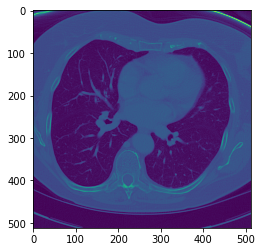

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])